# <center>Actividad Semanal -- 5 Repaso Transformación y reducción de dimensiones</center>
## <center>CIENCIA Y ANALITICA DE DATOS</center>
## <center>Profesor: María de La Paz Rico</center>
## <center>Alumno: Guillermo Alfonso Muñiz Hermosillo - A01793101</center>
## <center><a href=''>GITHUB LINK</a></center>


# Bienvenido al notebook
# Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [1]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B= np.dot(np.dot(W,D),Winv)
print(B)
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
-----------------------------


In [2]:
np.set_printoptions(precision=0, suppress=True)
def descomponerMatriz(Matriz):
    print("-------Matriz original-------")
    print(Matriz)
    print("-----------------------------")
    values, vectors = eig(Matriz)
    print(values) #D
    print(vectors) #W
    
    return values, vectors


def reconstruirMatriz(values, vectors):
    W = vectors
    Winv = np.linalg.inv(W)
    D = np.diag(values)

    print("-------Matriz reconstruida-------")
    B = np.dot(np.dot(W,D),Winv)
    print(B)
    print("-----------------------------")

In [3]:
#Matriz 1
M1 = array([[3, 0, 2], [3, 0, -2], [0, 1, 1]])
val1,vec1 = descomponerMatriz(M1)
reconstruirMatriz(val1,vec1)

-------Matriz original-------
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
-----------------------------
[4.+0.j 0.+2.j 0.-2.j]
[[-1.+0.j -0.+0.j -0.-0.j]
 [-1.+0.j  1.+0.j  1.-0.j]
 [-0.+0.j -0.-0.j -0.+0.j]]
-------Matriz reconstruida-------
[[ 3.-0.j  0.+0.j  2.+0.j]
 [ 3.-0.j  0.-0.j -2.+0.j]
 [ 0.-0.j  1.-0.j  1.+0.j]]
-----------------------------


In [4]:
#Matriz 2
M2 = np.array([[1,3,8],[2,0,0],[0,0,1]])
val2,vec2 = descomponerMatriz(M2)
reconstruirMatriz(val2,vec2)

-------Matriz original-------
[[1 3 8]
 [2 0 0]
 [0 0 1]]
-----------------------------
[ 3. -2.  1.]
[[ 1. -1. -0.]
 [ 1.  1. -1.]
 [ 0.  0.  0.]]
-------Matriz reconstruida-------
[[1. 3. 8.]
 [2. 0. 0.]
 [0. 0. 1.]]
-----------------------------


In [5]:
#Matriz 3
M3 = np.array([[5,4,0], [1,0,1], [10,7,1]])
val3,vec3 = descomponerMatriz(M3)
reconstruirMatriz(val3,vec3)

-------Matriz original-------
[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]
-----------------------------
[ 7. -0. -1.]
[[ 0.  1.  1.]
 [ 0. -1. -1.]
 [ 1. -0. -0.]]
-------Matriz reconstruida-------
[[ 5.  4. -0.]
 [ 1. -0.  1.]
 [10.  7.  1.]]
-----------------------------


**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



# Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


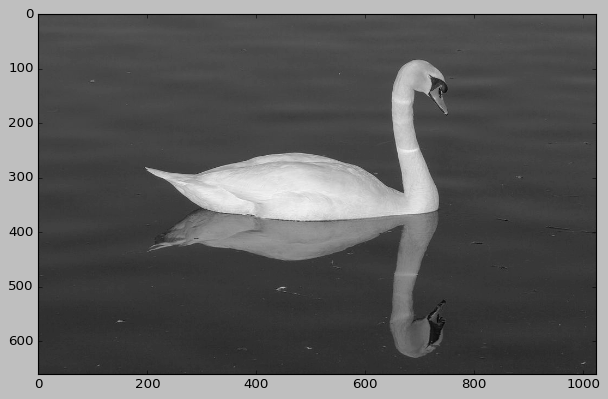

<PIL.Image.Image image mode=LA size=1024x660 at 0x7FBBF0DB7610>


In [10]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
# Agregamos certificatos SSL para correr en MAC
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [10]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(660, 1024)

In [11]:
U.shape

(660, 660)

In [12]:
V.shape

(1024, 1024)

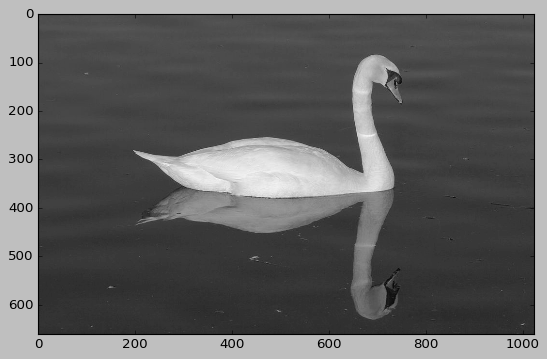

Felicidades la imagen está comprimida


In [20]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 660
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!, comprime 3 imagenes

In [43]:
def getImagemat(imgpath):
    img = Image.open(urllib.request.urlopen(imgpath))
    imgmat = np.array(list(img.getdata(band=0)),float)

    imgmat.shape = (img.size[1],img.size[0])

    plt.figure(figsize=(9,6))
    plt.imshow(imgmat)
    plt.show()
    return imgmat

def sdvImage(imgmat):
    U,D,V = np.linalg.svd(imgmat)
    print('Image Shape: ', imgmat.shape)
    print('U Shape: ', U.shape)
    print('V Shape: ', V.shape)
    return U,D,V
    
def reconstruirImg(nvalue, U,D,V):

    reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
    plt.imshow(reconstimg,cmap='gray')
    plt.show()
    print("La imagen está comprimida")

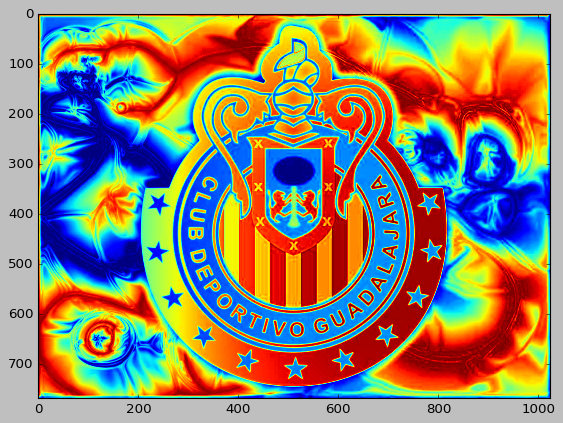

Image Shape:  (768, 1024)
U Shape:  (768, 768)
V Shape:  (1024, 1024)


In [44]:
#imagen 1
Imgpath1 = 'https://i.pinimg.com/originals/94/fa/e4/94fae402f434021c5a7cb2d99d52a399.jpg'
imgmat1 = getImagemat(Imgpath1)
U1,D1,V1 = sdvImage(imgmat1)

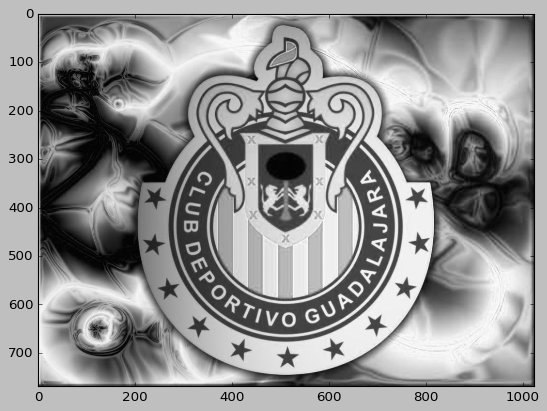

La imagen está comprimida


In [45]:
reconstruirImg(384, U1,D1,V1)

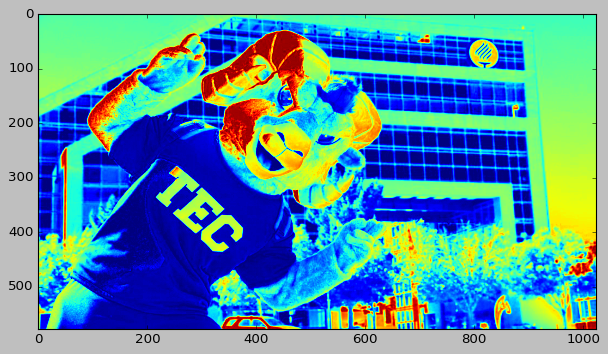

Image Shape:  (577, 1024)
U Shape:  (577, 577)
V Shape:  (1024, 1024)


In [46]:
#imagen 2
Imgpath2 = 'https://tec.mx/sites/default/files/styles/16_9_campus/public/repositorio/Campus/teus-frente-slp.jpg?itok=XMT6chhC'
imgmat2 = getImagemat(Imgpath2)
U2,D2,V2 = sdvImage(imgmat2)

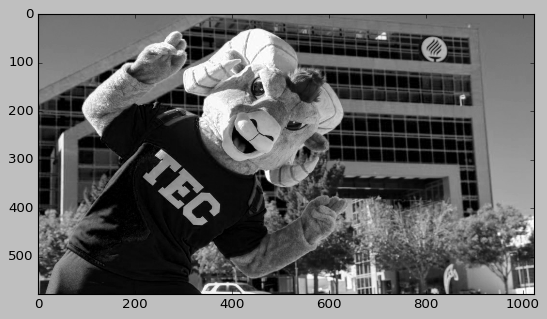

La imagen está comprimida


In [47]:
reconstruirImg(575, U2,D2,V2)

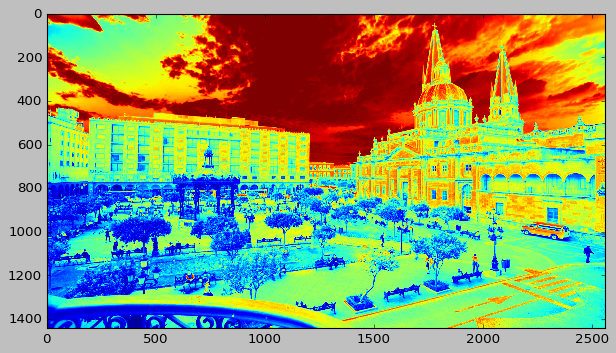

Image Shape:  (1440, 2560)
U Shape:  (1440, 1440)
V Shape:  (2560, 2560)


In [48]:
#imagen 3
Imgpath3 = 'https://a.travel-assets.com/findyours-php/viewfinder/images/res70/62000/62637-Guadalajara.jpg'
imgmat3 = getImagemat(Imgpath3)
U3,D3,V3 = sdvImage(imgmat3)

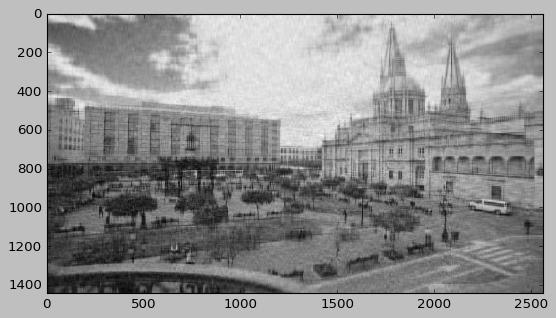

La imagen está comprimida


In [49]:
reconstruirImg(44, U3,D3,V3)

# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




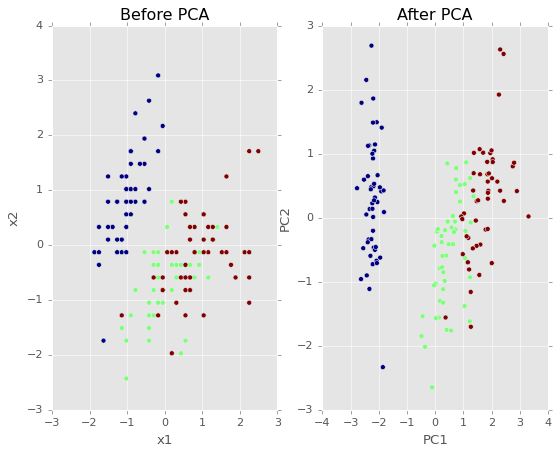

In [56]:
#tu codigo aqui
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')
# Load the data
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Z-score the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
# The PCA model
pca = PCA(n_components=2) # estimate only 2 PCs
X_new = pca.fit_transform(X) # project the original data into the PCA space

fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

np.set_printoptions(precision=5)

In [67]:
X.shape

(150, 4)

In [57]:
print(pca.explained_variance_ratio_)

[0.72962 0.22851]


In [58]:
np.cov(X_new.T)

array([[2.93809, 0.     ],
       [0.     , 0.92016]])

In [59]:
pca.explained_variance_

array([2.93809, 0.92016])

In [60]:
print(abs( pca.components_ ))

[[0.52107 0.26935 0.58041 0.56486]
 [0.37742 0.9233  0.02449 0.06694]]


In [61]:
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

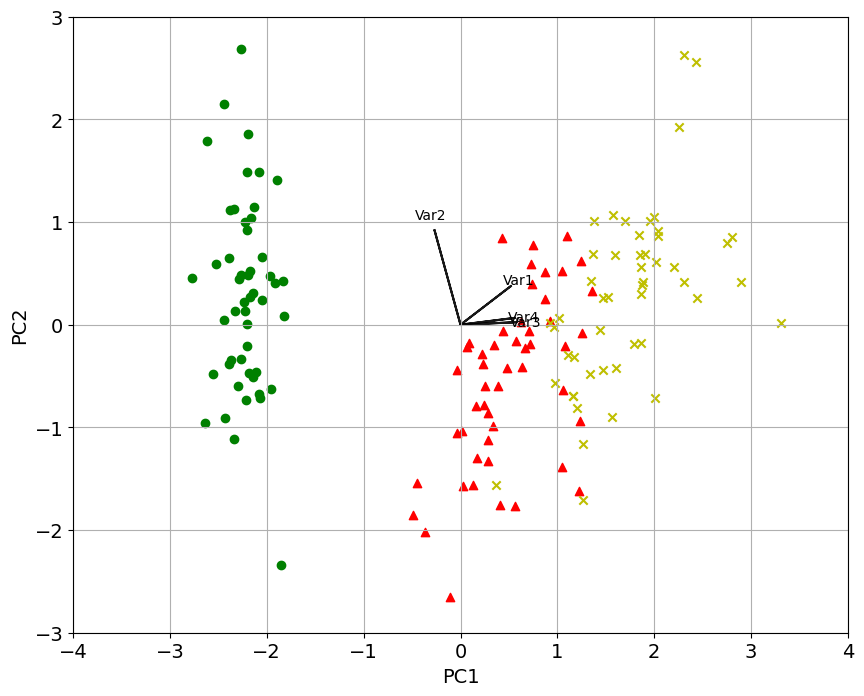

In [62]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style
# Call the biplot function for only the first 2 PCs
biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

In [63]:
# Var 3 and Var 4 are extremely positively correlated
np.corrcoef(X[:,2], X[:,3])[1,0]


0.9628654314027957

In [64]:
# Var 2and Var 3 are negatively correlated
np.corrcoef(X[:,1], X[:,2])[1,0]

-0.42844010433054014

## Describe lo relevante del ejercicio y que descubriste de las variables análizadas. 

Mediante la realizacion de este ejercicio descubri como al usar 2 componentes principales se podia explicar alrededor del 95% de la variancia y aprendi como comprobar esto al realizar la matriz de covariancia del espacio reducido, al observar esta matriz se observa como los valores en la diagonal para cada componente son los mismos que en la varianza explicada.

Asi pues, pude deducir tambien que cada componente principal tiene sus caracteristicas o variables de mayor importancia y comprobarlo mediante la grafica realizada fue realmente util ya que nos brinda una perspectiva clara de los datos que estamos analisando.

Finalmente con los coeficientes de correlacion aprendi a relacionar la grafica que se produjo y observar como las variables estaban correlacionadas entre ellas, ya fuera negativa o positivamente.

### ¿Qué es feature importance y para que nos sirve?

Feature importance lo definiría como el peso o relevancia que tiene una variable o característica de nuestro conjunto de datos en un componente principal de PCA. Esto se puede observar con la magnitud de los valores en los vectores de eigen cuando se aplica PCA. A mayor magnitud en el vector es mayor la importancia de la variable en el componente principal.
Esto nos puede servir para identificar las características que se encuentran relacionadas entre sí de las cuales podemos obtener un análisis cuantitativo de las características de nuestro interés.

### ¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?

Me pareció que los hallazgos más relevantes fueron: El porcentaje de varianza total que se explica usando solo 2 componentes principales. Esto nos ayudó a reducir de 4 características a solo 2 componentes a analizar. Así mismo, me pareció importante el descubrimiento de las características relevantes a cada componente, mediante el análisis de los pesos en los vectores descubrimos como las variables 3-4 y 2-3 estaban correlacionadas la una con la otra, eso hace sentido cuando vemos que con 2 componentes principales podemos explicar la gran mayoría de la varianza.

### ¿Dónde lo aplicarías o te sería de utilidad este conocimiento?
Este conocimiento definitivamente nos podría ser útil para encontrar alternativas de análisis y compresión de datos cuando las características de nuestro conjunto de datos sean demasiadas o bien cuando haya muchas variables correlacionadas unas con las otras. Al descomponer nuestro análisis en componentes principales no solo reducimos la complejidad y el tiempo de ejecución sino que nos ayuda a balancear nuestros datos de una mejor manera y minimizar los sesgos posibles en un conjunto de datos.